<a href="https://colab.research.google.com/github/ginacu/capstone-project-CSD-096/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aplikasi Rekomendasi Skincare Berdasarkan Permasalahan Wajah

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.express as px
import seaborn as sns
import missingno as mno
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Import the Dataset 

from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/Dataset/Capstone-Dataset-rev2 (2).csv"

'/content/drive/MyDrive/Dataset/Capstone-Dataset-rev2 (2).csv'


Preliminary Exploration

In [ ]:
skincare = pd.read_csv('/content/drive/MyDrive/Dataset/Capstone-Dataset-rev2 (2).csv', low_memory=False)
skincare.info()
skincare.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   produk-href      1034 non-null   object 
 1   product_name     1034 non-null   object 
 2   price            1034 non-null   object 
 3   description      1034 non-null   object 
 4   notable_effects  1034 non-null   object 
 5   skintype         1031 non-null   object 
 6   picture_src      1034 non-null   object 
 7   tipe_produk      1034 non-null   object 
 8   Unnamed: 8       0 non-null      float64
 9   Unnamed: 9       0 non-null      float64
 10  Unnamed: 10      0 non-null      float64
 11  Unnamed: 11      0 non-null      float64
 12  Unnamed: 12      0 non-null      float64
 13  Unnamed: 13      0 non-null      float64
 14  Unnamed: 14      0 non-null      float64
 15  Unnamed: 15      0 non-null      float64
 16  Unnamed: 16      0 non-null      float64
 17  Unnamed: 17   

,produk-href,product_name,price,description,notable_effects,skintype,picture_src,tipe_produk,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,https://www.beautyhaul.com/product/detail/acne...,Acne Gentle Cleansing Foam,Rp 35.000,Pembersih wajah bebas minyak untuk kulit BERJE...,"Acne-Free, Oil-Control, Pore-Care",Dry,https://www.beautyhaul.com/assets/uploads/prod...,facewash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.beautyhaul.com/product/detail/aloe...,Natur Aloe Mild Cleanser,Rp 79.000,Natur Aloe Mild Cleanser dengan brush yang lem...,"Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.beautyhaul.com/product/detail/acne...,Acne Care Lab Cleanser Scrub,Rp 104.500,Acne Care Lab Acne Cleanser Scrub Beta Plus (A...,Acne-Free,Dry,https://www.beautyhaul.com/assets/uploads/prod...,facewash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.beautyhaul.com/product/detail/brig...,Brightening Facial Cleanser,Rp 35.000,"Pembersih wajah yang segar, lembut dan creamy ...","Acne-Free, Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.beautyhaul.com/product/detail/pome...,Natur Pome Mild Cleanser,Rp 79.000,Natur Pome Mild Cleanser dengan brush yang lem...,"Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Remove column Unnamed 8-25 as not important to the model 

skincare.drop(["Unnamed: 8", "Unnamed: 9", "Unnamed: 10", "Unnamed: 11", "Unnamed: 12", "Unnamed: 13", "Unnamed: 14", "Unnamed: 15", "Unnamed: 16", "Unnamed: 17", "Unnamed: 18", "Unnamed: 19", "Unnamed: 20", "Unnamed: 21", "Unnamed: 22", "Unnamed: 23", "Unnamed: 24", "Unnamed: 25"], axis=1, inplace=True)
skincare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   produk-href      1034 non-null   object
 1   product_name     1034 non-null   object
 2   price            1034 non-null   object
 3   description      1034 non-null   object
 4   notable_effects  1034 non-null   object
 5   skintype         1031 non-null   object
 6   picture_src      1034 non-null   object
 7   tipe_produk      1034 non-null   object
dtypes: object(8)
memory usage: 64.8+ KB


# Data Exploration 

In [ ]:
# Let's look at the unique classes in data
skincare['notable_effects'].unique()

array(['Acne-Free, Oil-Control, Pore-Care',
       'Pore-Care, Brightening, Anti-Aging', 'Acne-Free',
       'Acne-Free, Pore-Care, Brightening, Anti-Aging', 'Anti-Aging',
       'Soothing, Brightening', 'Cleansing', 'Soothing, Moisturizing',
       'Hydrating, Soothing', 'Moisturizing',
       'Brightening, Anti-Aging, UV-Protection',
       'Hydrating, Moisturizing', 'Acne-Free, Brightening, Anti-Aging',
       'Anti-Aging\n', 'UV-Protection', 'Brightening, Anti-Aging',
       'Soothing, Balancing', 'Anti-Aging, UV-Protection',
       'Moisturizing, Brightening, Black-Spot',
       'Pore-Care,  Brightening, Anti-Aging',
       'Acne-Free,  Pore-Care, Anti-Aging', 'Brightening, UV-Protection',
       'Moisturizing, UV-Protection', 'UV-Protection, No-Whitecast'],
      dtype=object)

In [ ]:
# Looking at number of classes 
skincare['notable_effects'].nunique()

24

In [ ]:
categorical_features = ['notable_effects', 'skintype', 'tipe_produk']

(array([], dtype=float64), <a list of 0 Text major ticklabel objects>)

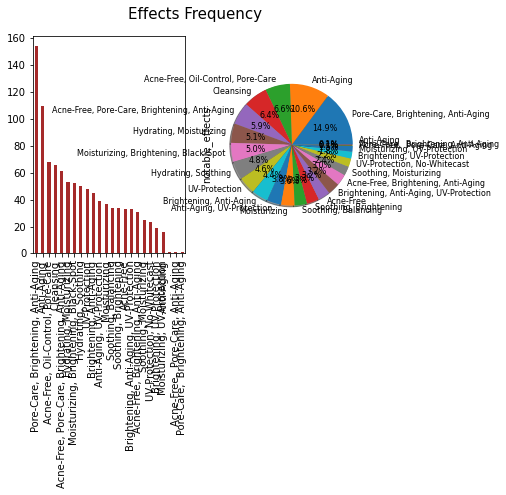

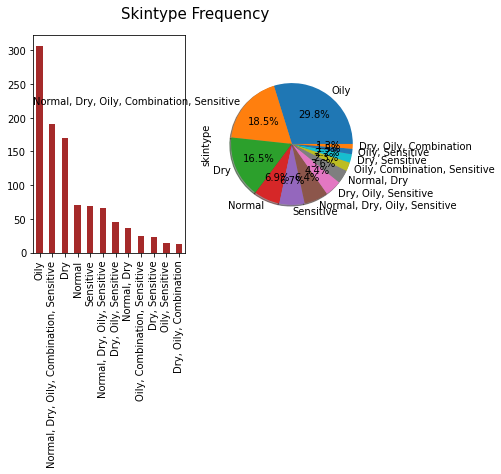

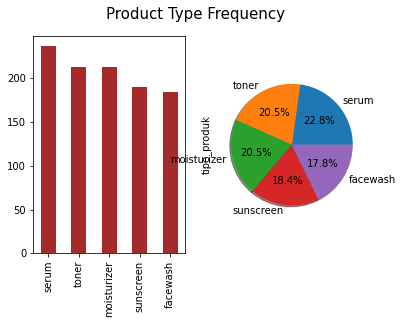

In [ ]:
#Plotting Categorical Variables

fig, ax = plt.subplots(1, 2)
skincare["notable_effects"].value_counts().plot.bar(color="brown", ax=ax[0])
skincare["notable_effects"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 8},ax=ax[1])
fig.suptitle("Effects Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
skincare["skintype"].value_counts().plot.bar(color="brown", ax=ax[0])
skincare["skintype"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Skintype Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
skincare["tipe_produk"].value_counts().plot.bar(color="brown", ax=ax[0])
skincare["tipe_produk"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Product Type Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

In [ ]:
# Creating numerical labels of notable_effects due to many effects shown by the diagram above
skincare['notable_effects']=skincare['notable_effects'].astype('category')
skincare['labels']=skincare['notable_effects'].cat.codes
skincare.head()

,produk-href,product_name,price,description,notable_effects,skintype,picture_src,tipe_produk,labels
0,https://www.beautyhaul.com/product/detail/acne...,Acne Gentle Cleansing Foam,Rp 35.000,Pembersih wajah bebas minyak untuk kulit BERJE...,"Acne-Free, Oil-Control, Pore-Care",Dry,https://www.beautyhaul.com/assets/uploads/prod...,facewash,3
1,https://www.beautyhaul.com/product/detail/aloe...,Natur Aloe Mild Cleanser,Rp 79.000,Natur Aloe Mild Cleanser dengan brush yang lem...,"Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash,18
2,https://www.beautyhaul.com/product/detail/acne...,Acne Care Lab Cleanser Scrub,Rp 104.500,Acne Care Lab Acne Cleanser Scrub Beta Plus (A...,Acne-Free,Dry,https://www.beautyhaul.com/assets/uploads/prod...,facewash,0
3,https://www.beautyhaul.com/product/detail/brig...,Brightening Facial Cleanser,Rp 35.000,"Pembersih wajah yang segar, lembut dan creamy ...","Acne-Free, Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash,4
4,https://www.beautyhaul.com/product/detail/pome...,Natur Pome Mild Cleanser,Rp 79.000,Natur Pome Mild Cleanser dengan brush yang lem...,"Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash,18


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



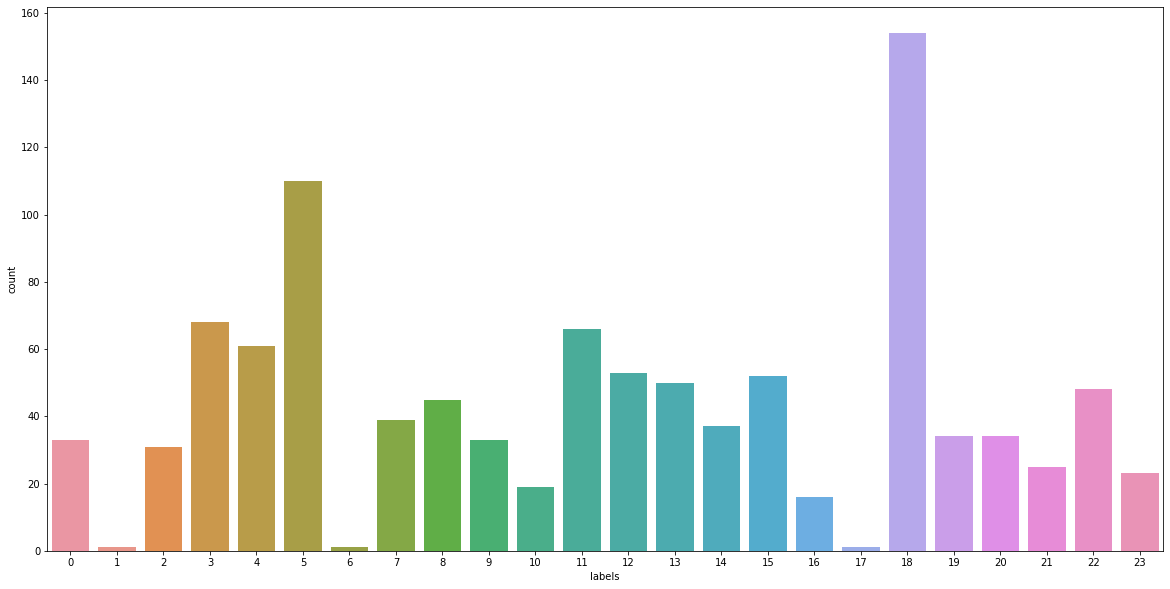

In [ ]:
# Looking at the label distribution
plt.figure(figsize=(20,10))
sns.countplot(skincare['labels'])

In [ ]:
# Checking data balancing 

auto_balancing = pd.DataFrame()
auto_balancing["Count"] = skincare["skintype"].value_counts()
auto_balancing["Count%"] = skincare["skintype"].value_counts()/skincare.shape[0]*100

auto_balancing

,Count,Count%
Oily,307,29.690522
"Normal, Dry, Oily, Combination, Sensitive",191,18.471954
Dry,170,16.441006
Normal,71,6.866538
Sensitive,69,6.673114
"Normal, Dry, Oily, Sensitive",66,6.382979
"Dry, Oily, Sensitive",45,4.352031
"Normal, Dry",37,3.578337
"Oily, Combination, Sensitive",24,2.321083
"Dry, Sensitive",23,2.224371


In [ ]:
# Checking data balancing (for classification)

auto_balancing = pd.DataFrame()
auto_balancing["Count"] = skincare["tipe_produk"].value_counts()
auto_balancing["Count%"] = skincare["tipe_produk"].value_counts()/skincare.shape[0]*100

auto_balancing

,Count,Count%
serum,236,22.823985
toner,212,20.502901
moisturizer,212,20.502901
sunscreen,190,18.375242
facewash,184,17.794971


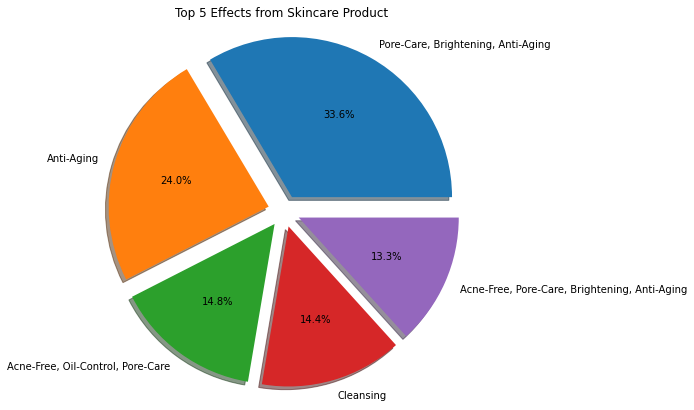

In [ ]:
# Plotting top notable_effects from skincare product 

top_effects=(skincare['notable_effects'].value_counts()).to_dict()
count= pd.DataFrame(list(top_effects.items()),columns = ['c','count'])
a = count.sort_values(by=['count'], ascending = False)
a.head(5)
labels = 'Pore-Care, Brightening, Anti-Aging','Anti-Aging','Acne-Free, Oil-Control, Pore-Care','Cleansing','Acne-Free, Pore-Care, Brightening, Anti-Aging'
sizes = [count['count'].iloc[0],count['count'].iloc[1],count['count'].iloc[2],count['count'].iloc[3],count['count'].iloc[4]]
explode = (0.1, 0.1, 0.1, 0.1,0.1)
fig1 , ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.title("Top 5 Effects from Skincare Product")
ax1.axis ('equal')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



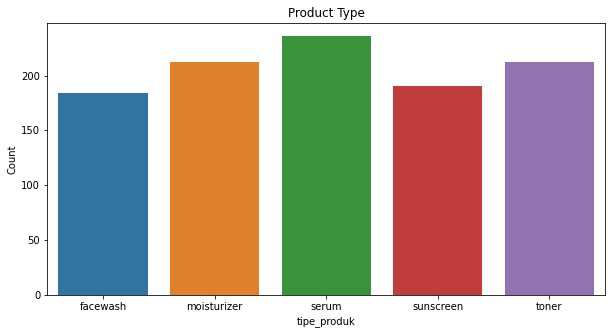

In [ ]:
plt.subplots(figsize=(10,5))
sns.countplot(skincare['tipe_produk'].sort_values())
plt.xlabel('tipe_produk')
plt.ylabel('Count')
plt.title('Product Type')

plt.show()

In [ ]:
# Checking null value 

skincare.isnull().sum()

produk-href        0
product_name       0
price              0
description        0
notable_effects    0
skintype           3
picture_src        0
tipe_produk        0
labels             0
dtype: int64

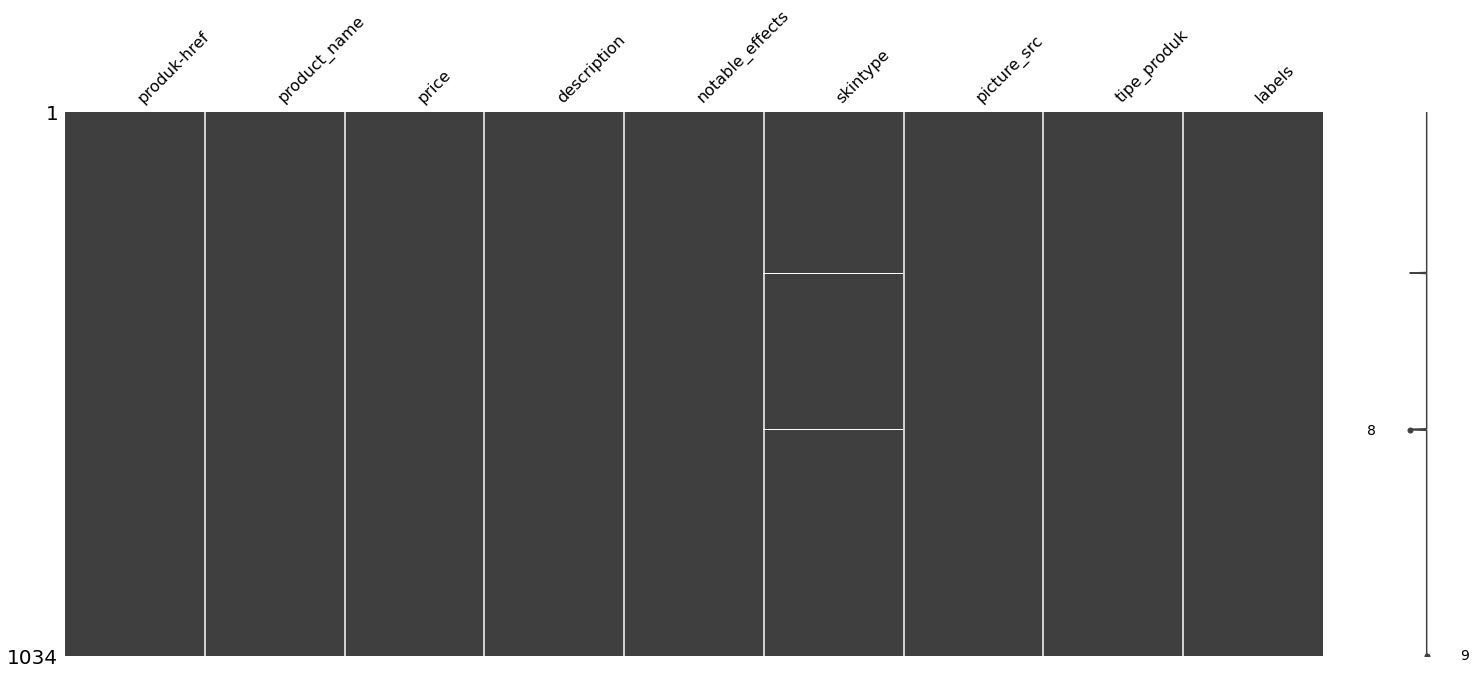

In [ ]:
# Visualize the missing values in the dataframe

mno.matrix(skincare)

In [ ]:
# Checking the existence of duplicated rows

skincare.duplicated().sum()

2

# Data Cleaning

In [ ]:
# Remove duplicated rows (2 in total)

skincare.drop_duplicates(inplace=True)

# Replacing the missing values"

skincare["skintype"].fillna("Dry, Oily, Combination", inplace=True)

In [ ]:
# Re-checking null value 

skincare.isnull().sum()

# Re-hecking the existence of duplicated rows

skincare.duplicated().sum()

0

In [ ]:
skincare.head()

,produk-href,product_name,price,description,notable_effects,skintype,picture_src,tipe_produk,labels
0,https://www.beautyhaul.com/product/detail/acne...,Acne Gentle Cleansing Foam,Rp 35.000,Pembersih wajah bebas minyak untuk kulit BERJE...,"Acne-Free, Oil-Control, Pore-Care",Dry,https://www.beautyhaul.com/assets/uploads/prod...,facewash,3
1,https://www.beautyhaul.com/product/detail/aloe...,Natur Aloe Mild Cleanser,Rp 79.000,Natur Aloe Mild Cleanser dengan brush yang lem...,"Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash,18
2,https://www.beautyhaul.com/product/detail/acne...,Acne Care Lab Cleanser Scrub,Rp 104.500,Acne Care Lab Acne Cleanser Scrub Beta Plus (A...,Acne-Free,Dry,https://www.beautyhaul.com/assets/uploads/prod...,facewash,0
3,https://www.beautyhaul.com/product/detail/brig...,Brightening Facial Cleanser,Rp 35.000,"Pembersih wajah yang segar, lembut dan creamy ...","Acne-Free, Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash,4
4,https://www.beautyhaul.com/product/detail/pome...,Natur Pome Mild Cleanser,Rp 79.000,Natur Pome Mild Cleanser dengan brush yang lem...,"Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash,18


# Data Preparation

## Encoding each skintypes

In [ ]:
# treat null values
skincare['skintype'].fillna('NA', inplace = True)

# separate all skintype into one list, considering comma + space as separators
skintype = skincare['skintype'].str.split(', ').tolist()

# flatten the list
flat_skintype = [item for sublist in skintype for item in sublist]

# convert to a set to make unique
set_skintype = set(flat_skintype)

# back to list
unique_skintype = list(set_skintype)

# create columns by each unique skintype
skincare = skincare.reindex(skincare.columns.tolist() + unique_skintype, axis=1, fill_value=0)

# for each value inside column, update the dummy
for index, row in skincare.iterrows():
    for val in row.skintype.split(', '):
        if val != 'NA':
            skincare.loc[index, val] = 1

skincare.drop('skintype', axis = 1, inplace = True)    
skincare

,produk-href,product_name,price,description,notable_effects,picture_src,tipe_produk,labels,Dry,Oily,Sensitive,Normal,Combination
0,https://www.beautyhaul.com/product/detail/acne...,Acne Gentle Cleansing Foam,Rp 35.000,Pembersih wajah bebas minyak untuk kulit BERJE...,"Acne-Free, Oil-Control, Pore-Care",https://www.beautyhaul.com/assets/uploads/prod...,facewash,3,1,0,0,0,0
1,https://www.beautyhaul.com/product/detail/aloe...,Natur Aloe Mild Cleanser,Rp 79.000,Natur Aloe Mild Cleanser dengan brush yang lem...,"Pore-Care, Brightening, Anti-Aging",https://www.beautyhaul.com/assets/uploads/prod...,facewash,18,1,1,1,0,0
2,https://www.beautyhaul.com/product/detail/acne...,Acne Care Lab Cleanser Scrub,Rp 104.500,Acne Care Lab Acne Cleanser Scrub Beta Plus (A...,Acne-Free,https://www.beautyhaul.com/assets/uploads/prod...,facewash,0,1,0,0,0,0
3,https://www.beautyhaul.com/product/detail/brig...,Brightening Facial Cleanser,Rp 35.000,"Pembersih wajah yang segar, lembut dan creamy ...","Acne-Free, Pore-Care, Brightening, Anti-Aging",https://www.beautyhaul.com/assets/uploads/prod...,facewash,4,1,1,1,0,0
4,https://www.beautyhaul.com/product/detail/pome...,Natur Pome Mild Cleanser,Rp 79.000,Natur Pome Mild Cleanser dengan brush yang lem...,"Pore-Care, Brightening, Anti-Aging",https://www.beautyhaul.com/assets/uploads/prod...,facewash,18,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,https://www.sociolla.com/sunscreen/51163-prote...,Pond's Protecting Day Cream Sunscreen Skin Pro...,Rp 26.400,POND’S Skin Protect Protecting Day Cream Tahuk...,"Moisturizing, UV-Protection","https://www.soco.id/cdn-cgi/image/w=73,format=...",sunscreen,16,1,1,1,1,1
1030,https://www.sociolla.com/sunscreen/16938-weigh...,For Skins Sake Weightless Sunscreen,Rp 40.000,This is the mini version of the FSS Weightless...,"UV-Protection, No-Whitecast",https://s3-ap-southeast-1.amazonaws.com/img-so...,sunscreen,23,1,1,1,1,1
1031,https://www.sociolla.com/sunscreen/12298-papay...,Benton Papaya S-Sun Cream,Rp 330.000,Papaya S-Sun Cream adalah suncream fisika dan ...,"Brightening, UV-Protection",https://s3-ap-southeast-1.amazonaws.com/img-so...,sunscreen,10,1,1,1,1,1
1032,https://www.sociolla.com/sunscreen/47934-kem-c...,Innisfree Intensive Leisure Sunscreen Stick SP...,Rp 270.000,"Stik tabir surya yang tahan air dan keringat, ...",UV-Protection,"https://www.soco.id/cdn-cgi/image/w=73,format=...",sunscreen,22,1,1,1,1,1


# Modelling

## Applying NLP concept

The map we’re making is the plot with an optional choice so that the users can get a more detailed result. There are going to be two kinds of options. One for the categories of product type such as moisturizer and sunscreen. The other for the skin types of users such as dry and oily. For make it clear, let’s focus on an option for “moisturizers for dry skin type” first and then apply the same process to other options later.

In [ ]:
# filtering the data 
df = skincare[skincare['tipe_produk'] == 'moisturizer'][skincare['Dry'] == 1]
df_moist_dry = df.reset_index()
df_moist_dry.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,index,produk-href,product_name,price,description,notable_effects,picture_src,tipe_produk,labels,Dry,Oily,Sensitive,Normal,Combination
0,638,https://www.beautyhaul.com/product/detail/dew-...,Noola Dew Moisturizer,Rp 129.000,"* Teman baik kulit dehidrasi, kering atau irit...","Hydrating, Soothing",https://www.beautyhaul.com/assets/uploads/prod...,moisturizer,13,1,0,1,0,0
1,642,https://www.beautyhaul.com/product/detail/brig...,SCARLETT BRIGHTENING Brightly Ever After Day C...,Rp 82.500,Didalam Brightly Ever After Day Cream terdapat...,"Brightening, Anti-Aging, UV-Protection",https://www.beautyhaul.com/assets/uploads/prod...,moisturizer,9,1,0,0,0,0
2,646,https://www.beautyhaul.com/product/detail/some...,SOMETHINC Ceramic Skin Saviour Moisturizer Gel,Rp 299.000,"Delivers 18hr Moisture Lock Ceramic Skin, Plum...","Pore-Care, Brightening, Anti-Aging",https://www.beautyhaul.com/assets/uploads/prod...,moisturizer,18,1,0,0,0,0
3,651,https://www.beautyhaul.com/product/detail/all-...,HALE All Rounder,Rp 129.000,A gel-cream moisturizer that provides your ski...,"Acne-Free, Pore-Care, Brightening, Anti-Aging",https://www.beautyhaul.com/assets/uploads/prod...,moisturizer,4,1,0,0,0,0
4,652,https://www.beautyhaul.com/product/detail/goku...,HADA LABO Gokujyun Ultimate Moisturizing Lotio...,Rp 48.000,Mengandung 3 jenis Hyaluronic Acid untuk memba...,Moisturizing,https://www.beautyhaul.com/assets/uploads/prod...,moisturizer,14,1,0,0,0,0


### TF-IDF Vectorizer

TF-IDF Vectorizer akan digunakan pada sistem rekomendasi untuk menemukan representasi fitur penting dari setiap kategori buku. Kita akan menggunakan fungsi tfidfvectorizer() dari library sklearn.

In [ ]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data 'book_title'
tf.fit(df_moist_dry['product_name']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['100ml',
 '10g',
 '15ml',
 '16',
 '20',
 '22',
 '30g',
 '40gr',
 '45ml',
 '500rp',
 '540',
 '70',
 '78',
 '92',
 '93',
 'acid',
 'acne',
 'acneact',
 'actress',
 'adoring',
 'advanced',
 'after',
 'age',
 'aging',
 'all',
 'almond',
 'aloe',
 'alpha',
 'anti',
 'antibacterial',
 'aqua',
 'arbutin',
 'ariul',
 'atoderm',
 'aubree',
 'avoskin',
 'azarine',
 'backstage',
 'bakuchiol',
 'balancium',
 'barrier',
 'beauty',
 'benton',
 'bhumi',
 'bio',
 'bioderma',
 'bloomka',
 'bomb',
 'boost',
 'botanical',
 'botanicals',
 'bran',
 'bright',
 'brightening',
 'brighter',
 'brightly',
 'buckthorn',
 'by',
 'calming',
 'care',
 'centella',
 'ceramic',
 'ceramide',
 'certified',
 'cica',
 'clear',
 'collection',
 'comfort',
 'concentrated',
 'cool',
 'corrector',
 'cosmetics',
 'cosrx',
 'cream',
 'creme',
 'daily',
 'day',
 'days',
 'de',
 'dear',
 'dew',
 'dewy',
 'divine',
 'douche',
 'dry',
 'elshe',
 'emina',
 'emulsion',
 'erha',
 'essence',
 'essential',
 'even',
 'ever',
 'everlasting

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(df_moist_dry['product_name']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(108, 267)

In [ ]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan nama produk
# Baris diisi dengan notable-effects
 
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=df_moist_dry.notable_effects
).sample(267, axis=1).sample(5, axis=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,serum,watermelon,skinotic,luminous,essential,ponds,backstage,92,ol21,ariul,avoskin,radiance,smoother,advanced,to,adoring,missha,probiotic,free,whitelab,emulsion,olay,ultra,30g,daily,revitalising,soothing,for,beauty,16,aloe,hc,niacinamide,night,tic,dry,multi,15ml,mask,fermented,...,phytosqualane,bomb,rx,lng,garnier,hydraglow,huxley,greentea,alpha,purito,lotion,bioderma,botanical,spray,days,boost,acneact,witch,regenerist,clear,buckthorn,rounder,me,hada,dear,stuff,bhumi,sake,sea,fss,safi,cream,antibacterial,day,oil,creme,very,essence,skin,ii
notable_effects,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Hydrating, Moisturizing",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.350144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Hydrating, Moisturizing",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.535591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.621825,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Anti-Aging,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.209047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Soothing, Brightening",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.419923,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.616875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Brightening, Anti-Aging",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.209047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Cosine Similarity

In [ ]:
# Menghitung cosine similarity pada matrix tf-idf
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.        , 0.12277584, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.11891323, 0.        ,
        0.        ],
       [0.12277584, 0.        , 1.        , ..., 0.        , 0.08384003,
        0.        ],
       ...,
       [0.        , 0.11891323, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.08384003, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa author buku
cosine_sim_df = pd.DataFrame(cosine_sim, index=df_moist_dry['notable_effects'], columns=df_moist_dry['notable_effects'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap author buku
cosine_sim_df.sample(7, axis=1).sample(10, axis=0)

Shape: (108, 108)


notable_effects,Moisturizing,UV-Protection,"Brightening, Anti-Aging, UV-Protection","Pore-Care, Brightening, Anti-Aging",Moisturizing,Moisturizing,"Hydrating, Soothing"
notable_effects,,,,,,,
Moisturizing,0.035767,0.000000,0.112480,0.0,0.0,0.000000,0.000000
UV-Protection,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000
Moisturizing,0.000000,0.168042,0.000000,0.0,0.0,0.000000,0.303296
Moisturizing,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000
UV-Protection,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000
"Hydrating, Moisturizing",0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
"Acne-Free, Oil-Control, Pore-Care",0.000000,0.000000,0.000000,0.0,0.0,0.073404,0.000000
"Hydrating, Moisturizing",0.042766,0.000000,0.038923,0.0,0.0,0.000000,0.000000
"Hydrating, Moisturizing",0.028744,0.000000,0.026161,0.0,0.0,0.000000,0.000000


### Mendapatkan Rekomendasi

In [ ]:
def skincare_recommendations(notable_effects, similarity_data=cosine_sim_df, items=df_moist_dry[['notable_effects', 'product_name']], n=5):
    
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,notable_effects].to_numpy().argpartition(
        range(-1, -n, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(n+2):-1]]
    
    # Drop nama_author agar nama buku yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(notable_effects, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(n)

In [ ]:
df_moist_dry[df_moist_dry.notable_effects.eq('Hydrating, Moisturizing')].head(1)

,index,produk-href,product_name,price,description,notable_effects,picture_src,tipe_produk,labels,Dry,Oily,Sensitive,Normal,Combination
31,738,https://www.sociolla.com/face-cream-lotion/121...,Garnier Garnier Sakura White Pinkish Radiance ...,Rp 89.000,Inovasi baru Essence Lotion yang dapat memberi...,"Hydrating, Moisturizing",https://s3-ap-southeast-1.amazonaws.com/img-so...,moisturizer,12,1,1,1,1,1


In [ ]:
# Mendapatkan rekomendasi buku yang mirip dengan buku dari author Kate White
skincare_recommendations('Hydrating, Moisturizing')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/extension.py:215: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



AttributeError: ignored